In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import elevation
%matplotlib inline

C:\Users\ngren\Anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


<Figure size 432x288 with 0 Axes>

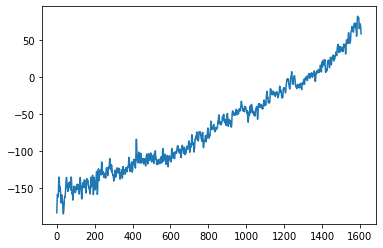

In [2]:
from datetime import datetime

headers = ['Time','GMSL','GMSL','uncertainty']
sea_level = pd.read_csv('sea_level.csv', names=headers)

level = sea_level['GMSL'].to_numpy()
level = np.delete(level, 0)
level = level.astype(np.float)

plt.clf()
fig,ax = plt.subplots(1)
time = np.arange(0, len(sea_level['Time'])-1, 1)

ax.plot(time, level)
plt.show()

8900.258890303749


<Figure size 432x288 with 0 Axes>

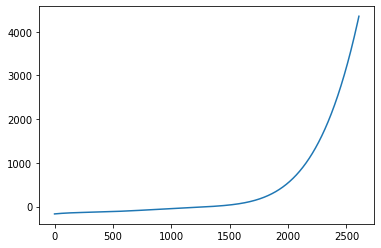

In [5]:
from numpy.polynomial import Chebyshev

order=5

pp=Chebyshev.fit(time,level,order)

tt = np.arange(0, (len(sea_level['Time'])-1) + 1000, 1) # new time range
new_level = pp(tt)

res2=0
for i, val in enumerate(pp(time)):
    res2+=np.abs(val - level[i])
print(res2)
    
plt.clf()
fig,ax = plt.subplots(1)
ax.plot(tt, new_level)
plt.show()